#**Wskaźnik giełdowy MACD**

**Autor: Łukasz Plust 186437**


Wstęp:

Celem projektu była implementacja wskaźnika MACD, który jest popularny i bardzo często wykorzystywany w analizie technicznej.
Projekt wykonałem w pythonie, w środowisku google colab, wykorzystując przy tym biblioteki takie jak np. pandas i plotly.graph_objects. Do implementacji wskaźnika oraz analizy wskaźnika wykorzystałem dane firmy Apple pobrane ze strony 'stooq'.

Krok 1:
Implementacja bibliotek

In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from collections import defaultdict
np.__version__

'1.22.4'

Krok 2: 
Wykorzystanie funkcji poznanej podczas kursu Pawła Krakowiaka do pobrania danych firmy Apple ze strony stooq.

W dalszej części kroku drugiego przetwarzam dane tak, aby uzyskać 1000 rekordów.

In [2]:
def fetch_financial_data(company='AAPL'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

In [3]:
apple = fetch_financial_data('AAPL')
apple = apple.reset_index()
df = pd.DataFrame(apple)
df = df.iloc[:1000]
values = df.Close
data = df.Date
open = df.Open

Dane Apple:

In [4]:
apple

Date      Open      High       Low     Close        Volume
0    2023-03-21  157.3200  159.4000  156.5400  159.2800  7.393828e+07
1    2023-03-20  155.0700  157.8200  154.1500  157.4000  7.364142e+07
2    2023-03-17  156.0800  156.7400  154.2800  155.0000  9.894463e+07
3    2023-03-16  152.1600  156.4600  151.6400  155.8500  7.625442e+07
4    2023-03-15  151.1900  153.2450  149.9200  152.9900  7.716787e+07
...         ...       ...       ...       ...       ...           ...
1252 2018-03-29   40.0578   40.9950   39.8345   40.0519  1.608691e+08
1253 2018-03-28   39.9213   40.5812   39.4317   39.7388  1.745688e+08
1254 2018-03-27   41.4545   41.8094   39.8405   40.1794  1.714436e+08
1255 2018-03-26   40.1157   41.3220   39.7288   41.2402  1.572776e+08
1256 2018-03-23   40.1924   40.5573   39.3749   39.3749  1.718885e+08

[1257 rows x 6 columns]

In [5]:
df

Date      Open      High       Low     Close        Volume
0   2023-03-21  157.3200  159.4000  156.5400  159.2800  7.393828e+07
1   2023-03-20  155.0700  157.8200  154.1500  157.4000  7.364142e+07
2   2023-03-17  156.0800  156.7400  154.2800  155.0000  9.894463e+07
3   2023-03-16  152.1600  156.4600  151.6400  155.8500  7.625442e+07
4   2023-03-15  151.1900  153.2450  149.9200  152.9900  7.716787e+07
..         ...       ...       ...       ...       ...           ...
995 2019-04-08   47.5998   48.5250   47.5799   48.4941  1.068040e+08
996 2019-04-05   47.6068   47.7623   47.4781   47.7394  7.645251e+07
997 2019-04-04   47.2020   47.5869   46.8053   47.4183  7.887744e+07
998 2019-04-03   46.8331   47.6197   46.8073   47.3376  9.603411e+07
999 2019-04-02   46.3058   47.1232   46.2958   47.0186  9.394563e+07

[1000 rows x 6 columns]

In [6]:
data

0     2023-03-21
1     2023-03-20
2     2023-03-17
3     2023-03-16
4     2023-03-15
         ...    
995   2019-04-08
996   2019-04-05
997   2019-04-04
998   2019-04-03
999   2019-04-02
Name: Date, Length: 1000, dtype: datetime64[ns]

In [7]:
values

0      159.2800
1      157.4000
2      155.0000
3      155.8500
4      152.9900
         ...   
995     48.4941
996     47.7394
997     47.4183
998     47.3376
999     47.0186
Name: Close, Length: 1000, dtype: float64

# Analiza zadania:

**Krok 3:**

Wyznaczenie dwóch średnich kroczących EMA: 

* Fast EMA - 12 okresów
* Slow EMA - 26 okresów

**EMA**

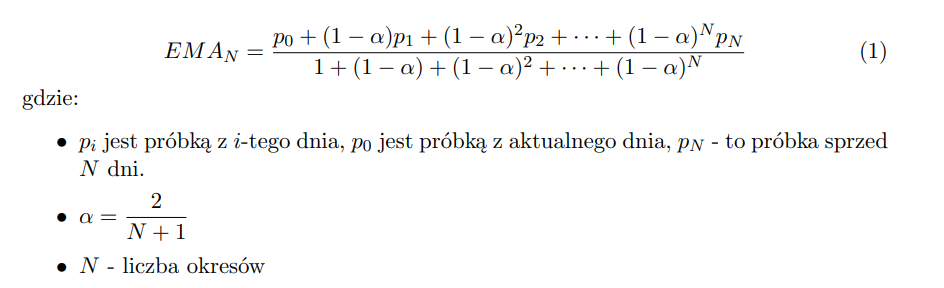

Pisemna analiza funkcji obliczająca EMA

In [8]:
#EMA
#po 13
#1. i=12 j=0 numerator(equal to 0) + 1*values[12] -> p0=(values[12]),denominator
#2  i=12 j=1 numerator + (1-alfa)^1 * values[11] -> p1=(values[11]),denominator + (1-alfa)^1
#3  i=12 j=2 numerator + (1-alfa)^2 *values[10] -> p2=(values[10]), denominator + (1-alfa)^2
#4  i=12 j=3 numerator + (1-alfa)^3 *values[9] -> p3=(values[9]),   denominator + (1-alfa)^3
#5  i=12 j=4 numerator + (1-alfa)^4 *values[8]-> p4=(values[8]),   denominator + (1-alfa)^4
#6  i=12 j=5 numerator + (1-alfa)^5 *values[7]-> p5=(values[7]),   denominator + (1-alfa)^5
#7  i=12 j=6 numerator + (1-alfa)^6 *values[6]-> p6=(values[6]),   denominator + (1-alfa)^6
#8  i=12 j=7 numerator + (1-alfa)^7 *values[5]-> p7=(values[5]),   denominator + (1-alfa)^7
#9  i=12 j=8 numerator + (1-alfa)^8 *values[4]-> p8=(values[4]),   denominator + (1-alfa)^8
#10  i=12 j=9 numerator + (1-alfa)^9 *values[3]-> p9=(values[3]),  denominator + (1-alfa)^9
#11 i=12 j=10 numerator + (1-alfa)^10 *values[2]-> p10=(values[2]), denominator + (1-alfa)^10
#12  i=12 j=11 numerator + (1-alfa)^11 *values[1]-> p11=(values[1]),denominator + (1-alfa)^11
#13  i=12 j=12 numerator + (1-alfa)^12* values[0]-> p12=(values[0]),denominator + (1-alfa)^12
#14  i=13 j=0 numerator + (1-alfa)^0 *values[13]-> p0=(values[13]), denominator + (1-alfa)^0
#15  i=13 j=1 numerator + (1-alfa)^1 *values[12]-> p1=(values[12]), denominator + (1-alfa)^1
#15  i=13 j=2 numerator + (1-alfa)^2 *values[11]-> p1=(values[11]), denominator + (1-alfa)^2
#15  i=13 j=3 numerator + (1-alfa)^3 *values[10]-> p1=(values[10]), denominator + (1-alfa)^3
#.....
# i=999 j=12 numerator + (1-alfa)^12 *values[987]-> p1=(values[987]), denominator + (1-alfa)^12


**Funkcja obliczająca EMA**

In [9]:
def Exponential_Moving_Average(N, values):
  alfa = 2/(N+1) #obliczenie alfy
  result_ema = []
  #N = 12,26
  for i in range(N,len(values)):
    numerator = 0 #licznik
    denominator = 0#mianownik
    for j in range(N+1):
      numerator = numerator + (1-alfa)**j * values[i-j]
      denominator = denominator +(1-alfa)**j
    result_ema.append(numerator/denominator)
  return result_ema

In [10]:
ema_12 = Exponential_Moving_Average(12,values)
ema_26 = Exponential_Moving_Average(26,values)

In [11]:
len(ema_12)

988

In [12]:
len(ema_26)

974

MACD

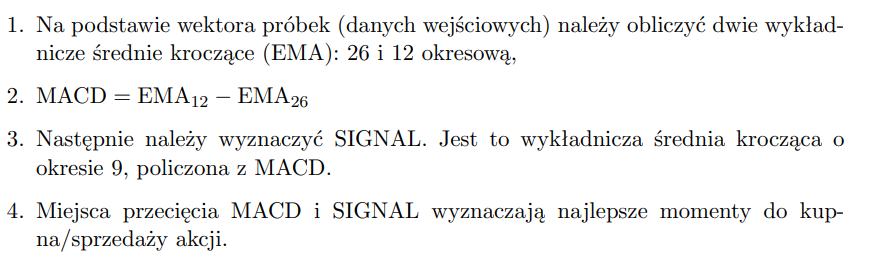

**Funkcja obliczająca MACD**

Do obliczenia MACD wykorzystuję wcześniej obliczone EMA 12 oraz EMA 26

Warto zwrócić uwagę na to, że EMA 12 ma długość 988, a EMA 26 ma długość 974. 
Z tego wynika, że EMA 12 jest dłuższa o 14. 

W tym przypadku należy przy odejmowaniu EMA 26 od EMA 12 dodać 14 do indeksu EMA 12, aby nie doprowadzić do sytuacji, gdy odejmujemy nieznane wartości EMA 26, od obliczonych wartości EMA 12



In [13]:
def Moving_Average_Convergence_Divergence(ema_12,ema_26):
  result_macd = []
  n=974 # dlugosc ema_26


#tutaj bardzo ważny moment gdzie dodaje 14, ponieważ ema_12 jest większa o 14 od ema_26. Jest to po to żeby wartosci,które odejmuje(ema_26) nie były randomowe.
  for i in range(n):
    result_macd.append(ema_12[i+14] - ema_26[i])
  return result_macd

**MACD**

In [14]:
result_macd = Moving_Average_Convergence_Divergence(ema_12,ema_26)

Kosmetyczna część kodu, gdzie przypisuje result_macd do macd i wstawiam do obiektu df

In [15]:
macd = pd.DataFrame(result_macd)

In [16]:
macd

0
0    0.401430
1    0.507662
2    0.638893
3    0.957315
4    0.979502
..        ...
969 -0.265533
970 -0.372567
971 -0.500560
972 -0.618019
973 -0.695535

[974 rows x 1 columns]

In [17]:
macd = pd.melt(macd)

In [18]:
macd

variable     value
0           0  0.401430
1           0  0.507662
2           0  0.638893
3           0  0.957315
4           0  0.979502
..        ...       ...
969         0 -0.265533
970         0 -0.372567
971         0 -0.500560
972         0 -0.618019
973         0 -0.695535

[974 rows x 2 columns]

In [19]:
macd

variable     value
0           0  0.401430
1           0  0.507662
2           0  0.638893
3           0  0.957315
4           0  0.979502
..        ...       ...
969         0 -0.265533
970         0 -0.372567
971         0 -0.500560
972         0 -0.618019
973         0 -0.695535

[974 rows x 2 columns]

In [20]:
macd.drop('variable', axis=1, inplace=True)
df['macd'] = macd

In [21]:
macd

value
0    0.401430
1    0.507662
2    0.638893
3    0.957315
4    0.979502
..        ...
969 -0.265533
970 -0.372567
971 -0.500560
972 -0.618019
973 -0.695535

[974 rows x 1 columns]

**SIGNAL**

Krok 4: 
  
  Signal jest wykładniczą średnią kroczącą o okresie 9 obliczoną z MACD.

In [22]:
signal = Exponential_Moving_Average(9, result_macd)

Kosmetyczna część kodu, gdzie przypisuje signal do signal i wstawiam do obiektu df

In [23]:
signal = pd.DataFrame(signal)
signal = pd.melt(signal)
signal.drop('variable', axis=1, inplace=True)
df['signal'] = signal

In [24]:
df

Date      Open      High       Low     Close        Volume  \
0   2023-03-21  157.3200  159.4000  156.5400  159.2800  7.393828e+07   
1   2023-03-20  155.0700  157.8200  154.1500  157.4000  7.364142e+07   
2   2023-03-17  156.0800  156.7400  154.2800  155.0000  9.894463e+07   
3   2023-03-16  152.1600  156.4600  151.6400  155.8500  7.625442e+07   
4   2023-03-15  151.1900  153.2450  149.9200  152.9900  7.716787e+07   
..         ...       ...       ...       ...       ...           ...   
995 2019-04-08   47.5998   48.5250   47.5799   48.4941  1.068040e+08   
996 2019-04-05   47.6068   47.7623   47.4781   47.7394  7.645251e+07   
997 2019-04-04   47.2020   47.5869   46.8053   47.4183  7.887744e+07   
998 2019-04-03   46.8331   47.6197   46.8073   47.3376  9.603411e+07   
999 2019-04-02   46.3058   47.1232   46.2958   47.0186  9.394563e+07   

         macd    signal  
0    0.401430  0.152753  
1    0.507662 -0.181784  
2    0.638893 -0.528469  
3    0.957315 -0.904374  
4    0.979502 -1.262454  
..        ...       ...  
995       NaN       NaN  
996       NaN       NaN  
997       NaN       NaN  
998       NaN       NaN  
999       NaN       NaN  

[1000 rows x 8 columns]

**DODATKOWO WSKAZNIK RSI - Relative Strength Index**

Wskaźnik RSI określa siłe trendu.

* RSI na poziomie 100 zwiększa prawdopodobieństwo odwrócenia trendu na zniżkowy

* RSI na poziomie 70 i więcej to sygnał sprzedaży.

* RSI na poziomie 30 i mniej to sygnał kupna.

* RSI na poziomie 0 zwiększa prawdopodobieństwo odwrócenia trendu na zwyżkowy.

RSI = 100 - (100 / 1 + RS)

RS  = (średnia wartość wzrostu cen zamkniecia z y dni / średnia wartość spadku cen z zamknięcia z y dni)

Do obliczenia RSI wykorzystuję skopiowane dane apple(file)

In [25]:
price_change = df['Close'].pct_change()
price_change = pd.DataFrame(price_change)
price_change = pd.melt(price_change)
price_change.drop('variable', axis=1, inplace=True)
df['Price_change'] = price_change

# pct_change -> znajduje procentową różnicę między wartościami w bieżącym wierszu, a poprzednim.
gain = df['Price_change'].apply(lambda x: x if x > 0 else 0)
gain = pd.DataFrame(gain)
gain = pd.melt(gain)
gain.drop('variable', axis=1, inplace=True)
df['gain'] = gain

loss = df['Price_change'].apply(lambda x: abs(x) if x< 0 else 0)
loss = pd.DataFrame(loss)
loss = pd.melt(loss)
loss.drop('variable', axis=1, inplace=True)
df['loss'] = loss

#.ewm -> oblicza Exponential Weighted Mean
ema_gain = df['gain'].ewm(span=14).mean()

ema_gain = pd.DataFrame(ema_gain)
ema_gain = pd.melt(ema_gain)
ema_gain.drop('variable', axis=1, inplace=True)
df['ema_gain'] = ema_gain

ema_loss = df['loss'].ewm(span=14).mean()

ema_loss = pd.DataFrame(ema_loss)
ema_loss = pd.melt(ema_loss)
ema_loss.drop('variable', axis=1, inplace=True)
df['ema_loss'] = ema_loss


rs = df['ema_gain'] / df['ema_loss']

rs = pd.DataFrame(rs)
rs = pd.melt(rs)
rs.drop('variable', axis=1, inplace=True)
df['rs'] = rs

rsi = df['rs'].apply(lambda x: 100-(100/(x+1)))

rsi = pd.DataFrame(rsi)
rsi = pd.melt(rsi)
rsi.drop('variable', axis=1, inplace=True)
df['rsi'] = rsi

In [26]:
df

Date      Open      High       Low     Close        Volume  \
0   2023-03-21  157.3200  159.4000  156.5400  159.2800  7.393828e+07   
1   2023-03-20  155.0700  157.8200  154.1500  157.4000  7.364142e+07   
2   2023-03-17  156.0800  156.7400  154.2800  155.0000  9.894463e+07   
3   2023-03-16  152.1600  156.4600  151.6400  155.8500  7.625442e+07   
4   2023-03-15  151.1900  153.2450  149.9200  152.9900  7.716787e+07   
..         ...       ...       ...       ...       ...           ...   
995 2019-04-08   47.5998   48.5250   47.5799   48.4941  1.068040e+08   
996 2019-04-05   47.6068   47.7623   47.4781   47.7394  7.645251e+07   
997 2019-04-04   47.2020   47.5869   46.8053   47.4183  7.887744e+07   
998 2019-04-03   46.8331   47.6197   46.8073   47.3376  9.603411e+07   
999 2019-04-02   46.3058   47.1232   46.2958   47.0186  9.394563e+07   

         macd    signal  Price_change      gain      loss  ema_gain  ema_loss  \
0    0.401430  0.152753           NaN  0.000000  0.000000  0.000000  0.000000   
1    0.507662 -0.181784     -0.011803  0.000000  0.011803  0.000000  0.006323   
2    0.638893 -0.528469     -0.015248  0.000000  0.015248  0.000000  0.009732   
3    0.957315 -0.904374      0.005484  0.005484  0.000000  0.001678  0.006755   
4    0.979502 -1.262454     -0.018351  0.000000  0.018351  0.001240  0.009780   
..        ...       ...           ...       ...       ...       ...       ...   
995       NaN       NaN      0.003074  0.003074  0.000000  0.003218  0.003820   
996       NaN       NaN     -0.015563  0.000000  0.015563  0.002789  0.005386   
997       NaN       NaN     -0.006726  0.000000  0.006726  0.002417  0.005565   
998       NaN       NaN     -0.001702  0.000000  0.001702  0.002095  0.005050   
999       NaN       NaN     -0.006739  0.000000  0.006739  0.001816  0.005275   

           rs        rsi  
0         NaN        NaN  
1    0.000000   0.000000  
2    0.000000   0.000000  
3    0.248362  19.895004  
4    0.126782  11.251674  
..        ...        ...  
995  0.842434  45.723961  
996  0.517878  34.118535  
997  0.434416  30.285225  
998  0.414895  29.323371  
999  0.344223  25.607574  

[1000 rows x 15 columns]

**Analiza skuteczności**

Krok 5: 

Wizualizacja za pomocą wykresu.

Do zobrazowania wykorzystałem bibliotekę plotly.graph_objects.


Wykres MACD oraz SIGNAL

In [27]:
#Scatter -> wykres liniowy
trace0 = go.Scatter(x=df.Date,y=df.macd,name='macd')
trace1 = go.Scatter(x=df.Date,y=df.signal,name='signal')
data = [trace0,trace1]

layout = go.Layout(yaxis_type='linear',title='Chart MACD & SIGNAL',width=1310,yaxis_title="Wartość wskaźnika")
fig = go.Figure(data=data, layout=layout)
fig.show()

Analiza wykorzystując wskaźnik MACD oraz Signal

Z powyższego wykresu można wywnioskować, że wskaźnik MACD podąża za trendem, jednak z opóźnieniem. Po zmianie trendu danego indeksu wskaźnik potrzebuje czasu na powrót do podążania za trendem. Warto zwrócić uwagę, że jest to analiza długoterminowa i wskaźnik może mieć bardzo korzystne zastosowanie dla spółek,które nie doprowadzają do nagłych zmian wartości ceny spółki. 

Wskaźnik ten zalicza się do oscylatorów, czyli sygnalizuje możliwość pojawienia się lokalnego wierzchołka i lokalnego dołka, co sprawia, że idealnie sprawdzi się do długoterminowych analiz.

W momencie, gdy linia signal przecina z góry linię macd jest to sygnał do kupna. Bardzo dobrze widać to w okresie około lutego,września 2020 roku oraz w styczniu oraz kwietniu 2022 roku.

W momencie, gdy linia signal przecina od dołu linię macd jest to sygnał do sprzedaży. Jest to widoczne we wiosnę oraz jesienią 2020,2021 oraz 2022. Widać tu pewną zbieżność kiedy warto sprzedawać :))

**Wykres wartości Apple**

In [28]:
trace2 = go.Scatter(x=df.Date,y=values,name='apple')
data = [trace2]

layout = go.Layout(yaxis_type='linear',title='Valuation Apple',yaxis_title='cena USD')
fig = go.Figure(data=data, layout=layout)
fig.show()

Dodaje linie 30 oraz 70, celem określenia siły trendu.

In [29]:
df['X'] = 30
df['Y'] = 70

**Wykres wartości Apple wraz z MACD, SIGNAL oraz RSI**


In [30]:
trace0 = go.Scatter(x=df.Date,y=df.macd,name='macd')
trace1 = go.Scatter(x=df.Date,y=df.signal,name='signal')
trace2 = go.Scatter(x=df.Date,y=values,name='apple')
trace3 = go.Scatter(x=df.Date,y=df.rsi,name='rsi')
trace4 = go.Scatter(x=df.Date,y=df.X,name='30') #wskaznik ponizej 30 -> rynek wyprzedany -> brak siły na spadki
trace5 = go.Scatter(x=df.Date,y=df.Y,name='70') # wskaznik powyżej 70 -> rynek wykupiony -> brak sily na wzrost
data = [trace0,trace1,trace2,trace3,trace4,trace5]

layout = go.Layout(yaxis_type='linear',title='Chart MACD & SIGNAL & Valuation Apple & RSI',width=1310,yaxis_title="Wartość wskaźnika wraz z macd i signal oraz RSI")
fig = go.Figure(data=data, layout=layout)
fig.show()

**Analiza wykorzystując RSI**

Biorąc pod uwagę wskaźnik RSI widać, że sprawdza się on doskonale długoterminowo, jak i krótkoterminowo. Wiosną 2020 roku można było wykorzystać go do dwóch shortów. Na przełomie sierpnia i września oraz na wiosnę 2020 roku można było 'złapać' longa. Również wiosną 2021 roku można było go wykorzystać do shortowania. Wiosną i latem 2022 roku idealnie wskazał sygnały do zakupu, jak i do sprzedaży. Wskaźnik zaczął wykonywać ogromne ruchu w ciągu ostatnich kilku dni. Myślę, że ma to związek z upadającymi bankami.

**Implementacja algorytmu**

In [31]:
def earn(macd,signal,rsi,day,df):
  global money
  global stocks
  if money != 0: # zakup
    if df.macd[day-1] < df.signal[day-1]:
      if df.macd[day] > df.signal[day]: # te dwa warunki spelniaja zalozenie przeciecia macd od gory przez signal, co jest sygnalem do zakupu
        if df.rsi[day] < 30:
          new_stocks = (money/df.iloc[day,4]) #close ->4
          money = round(money - (df.iloc[day,4] * new_stocks),2)
          stocks = stocks + new_stocks
          print(df.iloc[day,0], " dnia kupilem", round(new_stocks,1), " akcji, gdzie cena za sztuke to :  ",df.iloc[day, 4],"USD, akcje kupiłem za ", round(df.iloc[day, 4] * new_stocks,1), "USD")
  if stocks != 0: #sprzedaz
    if df.macd[day-1] > df.signal[day-1]:
      if df.macd[day] < df.signal[day]: # te dwa warunki spelniaja zalozenie przeciecia macd od dolu przez signal, co jest sygnalem do sprzedazy
        if df.rsi[day] > 70:
          new_money = round(df.iloc[day,4]*stocks,2)
          money = money + new_money
          print(df.iloc[day,0], " dnia sprzedalem", round(stocks,1),"akcji, gdzie cena za sztuke to : ", df.iloc[day, 4],"USD, akcje sprzedałem za ", money, "USD")
          stocks = 0

In [32]:
money =10000
stocks =2000
for i in range(1,1001,1):
  earn(macd,signal,rsi,i,df)

2023-01-13 00:00:00  dnia kupilem 74.2  akcji, gdzie cena za sztuke to :   134.76 USD, akcje kupiłem za  10000.0 USD
2022-12-05 00:00:00  dnia sprzedalem 2074.2 akcji, gdzie cena za sztuke to :  146.63 USD, akcje sprzedałem za  304140.83 USD
2022-07-12 00:00:00  dnia kupilem 2091.5  akcji, gdzie cena za sztuke to :   145.417 USD, akcje kupiłem za  304140.8 USD


In [33]:
without_decisions = round(df.iloc[999, 4]*2000, 1)
worth_of_wallet = money+round(df.iloc[999, 4]*stocks, 1)
worth_of_stocks = round(stocks,1)
teoretical_profit = round(worth_of_wallet - without_decisions,1)
print("Ilość akcji: ", worth_of_stocks, "sztuk")
print("Wartość akcji bez podejmowania, żadnych decyzji", without_decisions,"USD")
print("Obecna wartość portfela", worth_of_wallet,"USD")
print("Teoretyczny zysk wynosi: ", teoretical_profit,"USD")

Ilość akcji:  2091.5 sztuk
Wartość akcji bez podejmowania, żadnych decyzji 94037.2 USD
Obecna wartość portfela 98339.8 USD
Teoretyczny zysk wynosi:  4302.6 USD
